In [2]:
import cv2

events = [i for i in dir(cv2) if 'EVENT' in i]

print(events)

['EVENT_FLAG_ALTKEY', 'EVENT_FLAG_CTRLKEY', 'EVENT_FLAG_LBUTTON', 'EVENT_FLAG_MBUTTON', 'EVENT_FLAG_RBUTTON', 'EVENT_FLAG_SHIFTKEY', 'EVENT_LBUTTONDBLCLK', 'EVENT_LBUTTONDOWN', 'EVENT_LBUTTONUP', 'EVENT_MBUTTONDBLCLK', 'EVENT_MBUTTONDOWN', 'EVENT_MBUTTONUP', 'EVENT_MOUSEHWHEEL', 'EVENT_MOUSEMOVE', 'EVENT_MOUSEWHEEL', 'EVENT_RBUTTONDBLCLK', 'EVENT_RBUTTONDOWN', 'EVENT_RBUTTONUP']


In [1]:
import cv2
import numpy as np 
from random import randint

def draw_circle(event, x, y, flag, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        rndclr = randint(50, 127)
        radius = randint(15, 180)
        cv2.circle(img, (x, y), radius, (150*rndclr//100, 1*rndclr//100, 200*rndclr//100), -1)

img = np.zeros((512, 512, 3), np.uint8)

cv2.namedWindow('image')
cv2.setMouseCallback('image', draw_circle)

while True:
    cv2.imshow('image', img)
    if cv2.waitKey(1) & 0xFF == 27:
        break

cv2.destroyAllWindows()



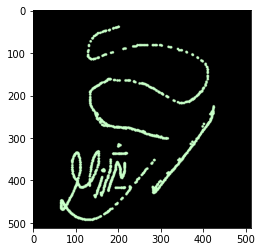

In [11]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

drawing = False

def brush(event, x, y, flags, param):
    global drawing
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            cv2.circle(img, (x, y), 3, (200, 255, 200), -1)
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False

img = np.zeros((512, 512, 3), np.uint8)

cv2.namedWindow('image')
cv2.setMouseCallback('image', brush)

while True:
    cv2.imshow('image', img)
    if cv2.waitKey(1) & 0xFF == 27:
        break
        
cv2.destroyAllWindows()
plt.imshow(img[...,::-1])

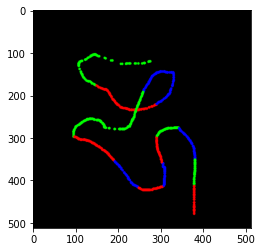

In [12]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

drawing = False
color = (0, 255, 0)

def brush(event, x, y, flags, param):
    global drawing, color
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            cv2.circle(img, (x, y), 3, color, -1)
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False

img = np.zeros((512, 512, 3), np.uint8)

cv2.namedWindow('image')
cv2.setMouseCallback('image', brush)

while True:
    cv2.imshow('image', img)
    k = cv2.waitKey(1) & 0xFF
    
    if k == ord('b'):
        color = (255, 0, 0)
    elif k == ord('g'):
        color = (0, 255, 0)
    elif k == ord('r'):
        color = (0, 0, 255)
    elif k == 27:
        break
        
        
cv2.destroyAllWindows()
plt.imshow(img[...,::-1])


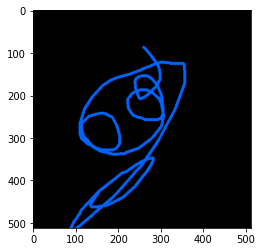

In [4]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

drawing = False
point = (-1, -1)

def brush(event, x, y, flags, param):
    global drawing, point
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            if point[0] >= 0:
                cv2.line(img, point, (x, y), (250, 100, 0), 5)
            point = (x, y)
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        point = (-1, -1)

img = np.zeros((512, 512, 3), np.uint8)

cv2.namedWindow('image')
cv2.setMouseCallback('image', brush)

while True:
    cv2.imshow('image', img)
    k = cv2.waitKey(1) & 0xFF 
    
    if k == 27:
        break
    elif k == ord('c'):
        cv2.rectangle(img, (0, 0), (512, 512), (0, 0, 0), -5)
        
cv2.destroyAllWindows()
plt.imshow(img[...,::-1])

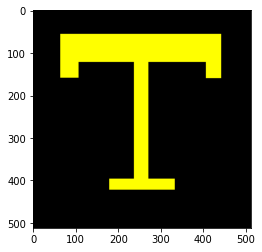

In [2]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

drawing = False
point = (-1, -1)
flg = True

def brush(event, x, y, flags, param):
    global drawing, point, tmp, img
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        point = (x, y)
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            cv2.rectangle(img, point, (x, y), (0, 2552, 255), 2)
        #point = (x, y)
    elif event == cv2.EVENT_LBUTTONUP:
        cv2.rectangle(img, point, (x, y), (0, 2552, 255), -5)
        drawing = False
        tmp = img.copy()

img = np.zeros((512, 512, 3), np.uint8)
tmp = img.copy()

cv2.namedWindow('image')
cv2.setMouseCallback('image', brush)

while True:
    global flg
    cv2.imshow('image', img)
    k = cv2.waitKey(1) & 0xFF 
    if flg and drawing:
        img = tmp.copy()
        flg = False
    else:
        flg = True
    
    if k == 27:
        break
    elif k == ord('c'):
        cv2.rectangle(img, (0, 0), (512, 512), (0, 0, 0), -5)
        
cv2.destroyAllWindows()
plt.imshow(img[...,::-1])

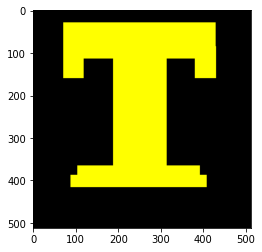

In [18]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

drawing = False
point = (-1, -1)
flg = True

def brush(event, x, y, flags, param):
    global drawing, point, img, tmp
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        point = (x, y)
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            img = tmp.copy()
            cv2.rectangle(img, point, (x, y), (0, 2552, 255), 1)
        #point = (x, y)
    elif event == cv2.EVENT_LBUTTONUP:
        cv2.rectangle(img, point, (x, y), (0, 2552, 255), -5)
        drawing = False
        tmp = img.copy()

img = np.zeros((512, 512, 3), np.uint8)
tmp = img.copy()
clear = img.copy()

cv2.namedWindow('image')
cv2.setMouseCallback('image', brush)

while True:
    cv2.imshow('image', img)
    k = cv2.waitKey(1) & 0xFF 
    
    if k == 27:
        break
    elif k == ord('c'):
        img = clear.copy()
        tmp = clear.copy()
        
cv2.destroyAllWindows()
plt.imshow(img[...,::-1])

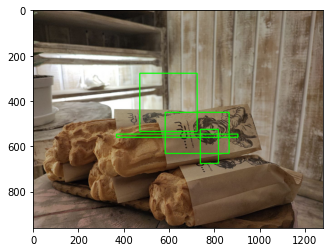

In [4]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

drawing = False
point = (-1, -1)
flg = True

def brush(event, x, y, flags, param):
    global drawing, point, img
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        point = (x, y)
    elif event == cv2.EVENT_LBUTTONUP:
        cv2.rectangle(img, point, (x, y), (0, 255, 0), 4)
        drawing = False

img = cv2.imread('./images/noon_khameii.jpg')
clear = img.copy()

cv2.namedWindow('image')
cv2.setMouseCallback('image', brush)

while True:
    cv2.imshow('image', img)
    k = cv2.waitKey(1) & 0xFF 
    
    if k == 27:
        break
    elif k == ord('c'):
        img = clear.copy()
        
cv2.destroyAllWindows()
plt.imshow(img[...,::-1])

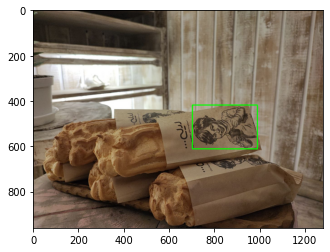

In [33]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

drawing = False
point = (-1, -1)
flg = True

def brush(event, x, y, flags, param):
    global drawing, point, img, tmp
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        point = (x, y)
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            img = tmp.copy()
            cv2.rectangle(img, point, (x, y), (50, 255, 0), 2)
        #point = (x, y)
    elif event == cv2.EVENT_LBUTTONUP:
        cv2.rectangle(img, point, (x, y), (0, 255, 0), 4)
        drawing = False
        tmp = img.copy()

img = cv2.imread('./images/noon_khameii.jpg')
tmp = img.copy()
clear = img.copy()

cv2.namedWindow('image')
cv2.setMouseCallback('image', brush)

while True:
    cv2.imshow('image', img)
    k = cv2.waitKey(1) & 0xFF 
    
    if k == 27:
        break
    elif k == ord('c'):
        img = clear.copy()
        tmp = clear.copy()
        
cv2.destroyAllWindows()
plt.imshow(img[...,::-1])

[[(985, 419), (701, 626)], [(948, 713), (774, 640)], [(616, 472), (689, 584)], [(410, 443), (464, 509)]]


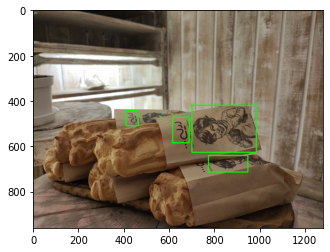

In [10]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

drawing = False
start_point = (-1, -1)
points = []
flg = True

def brush(event, x, y, flags, param):
    global drawing, start_point, img, tmp
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        start_point = (x, y)
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            tmp = img.copy()
            cv2.rectangle(tmp, start_point, (x, y), (50, 255, 0), 2)
            cv2.imshow('image', tmp)
        #start_point = (x, y)
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        img = tmp.copy()
        cv2.rectangle(img, start_point, (x, y), (0, 255, 0), 4)
        points.append([start_point, (x, y)])

img = cv2.imread('./images/noon_khameii.jpg')
tmp = img.copy()
clear = img.copy()

cv2.namedWindow('image')
cv2.setMouseCallback('image', brush)

while True:
    if not drawing:
        cv2.imshow('image', img)
        
    k = cv2.waitKey(1) & 0xFF 
    
    if k == 27:
        break
    elif k == ord('z'):
        img = clear.copy()
        tmp = clear.copy()
        points.pop()
        for p in points:
            cv2.rectangle(img, p[0], p[1], (0, 255, 0), 4)
        
    elif k == ord('c'):
        img = clear.copy()
        tmp = clear.copy()
        points = []
        
cv2.destroyAllWindows()
plt.imshow(img[...,::-1])
print(points)